# Predicting Titanic Survival: Traditional Machine Learning vs. Deep Learning

## Introduction
This tutorial uses the Titanic dataset available on OpenML.org, which is obtained from Vanderbilt University's Department of Biostatistics at https://hbiostat.org/data. The Titanic data provides information about the survival of passengers on the Titanic and characteristics about the passengers such as age and ticket class. Using this data, the tutorial will establish a model for predicting whether a given passenger would have survived the sinking of the Titanic. We will explore and preprocess the data, train models using traditional machine learning algorithms, and then improve the model using deep learning techniques. Finally, we will compare the performances of these models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

#for deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

#import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Titanic dataset
data = pd.read_csv('titanic3.csv')

In [2]:
data = pd.read_csv('titanic3.csv')

## Data Preprocessing
- *Replace '?' with NaN* to convert 'age' and 'fare' features from object to float data type.
- `sex`: Map 'male' to 1 and 'female' to 0.
- apply feature engineering to improve the model


In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_4800\2652054078.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


Now that the data is in good shape, you can use seaborn and matplotlib to view how certain columns of the dataset relate to survivability. run the below cell

<Axes: xlabel='survived', ylabel='fare'>

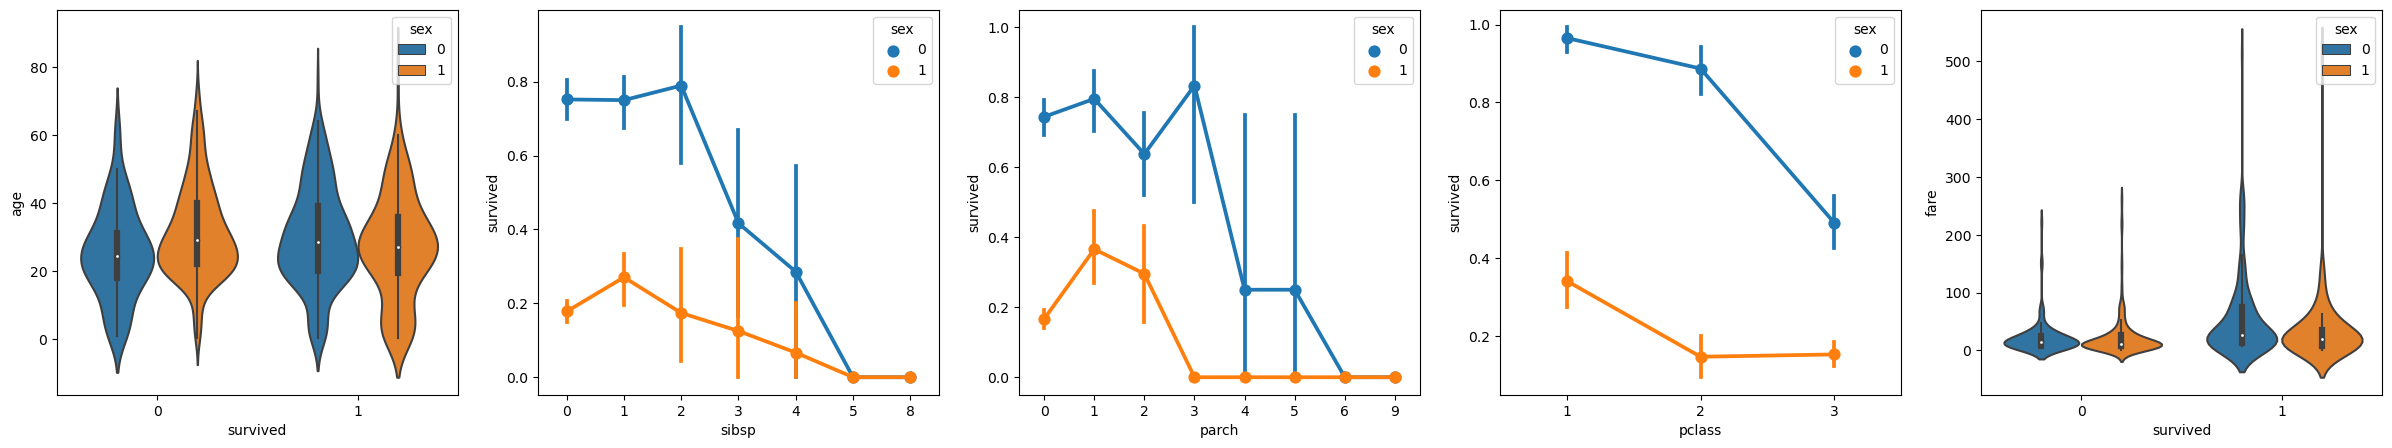

In [4]:

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Now, you can analyze the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the target feature('survived'). Use the following code to correlate the relationship between all variables and survival.

In [5]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Looking at the correlation results, you'll notice that some variables like gender have a fairly high correlation to survival, while others like relatives (sibsp = siblings or spouse, parch = parents or children) seem to have little correlation.

Let's hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability. To do this, you will check if for a given passenger, the number of sibsp and parch is greater than 0 and, if so, you can then say that they had a relative on board.

Use the following code to create a new variable and column in the dataset called relatives and check the correlation again.

In [6]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


You'll notice that in fact when looked at from the standpoint of whether a person had relatives, versus how many relatives, there is a higher correlation with survival. With this information in hand, you can now drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values, to end up with a dataset that can be used for training a model.

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

## Train and evaluate a model
- split the dataset into training and testing
- normalize the dataset so that all values are in same range

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

There are many different machine learning algorithms that you could choose from to model the data. The `scikit-learn` library also provides support for many of them and a chart to help select the one that's right for your scenario. For now, use the `Naïve Bayes algorithm`, a common algorithm for classification problems.

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.7990430622009569
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       128
           1       0.74      0.74      0.74        81

    accuracy                           0.80       209
   macro avg       0.79      0.79      0.79       209
weighted avg       0.80      0.80      0.80       209



With a trained model, you can now try it against the test data set that was held back from training. Add and run the following code to predict the outcome of the test data and calculate the accuracy of the model.

In [11]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


## apply deep learning model
 As you have notice the accuracy of the model is 75% approximately let's now try with deep learning how it improve the accuracy

In [12]:
model = Sequential()
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


Once the model is created, it needs to be compiled. As part of this, you need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for. Add the following code to build and train the model.

In [14]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5730
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.5909
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6878
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7584
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.7644
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.7751
Epoch 11/50
27/27 [

Now that the model is built and trained, we can see how it works against the test data.

In [15]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.8038277511961722


Do you notice our model performance is increased by `5%` on just this little dataset. 
What about on a large dataset? Surely, it will help in improving model accuracy.

Now let's implement how to perform prediction on a single sample.

**Prediction**

In [16]:
single_sample = X_test[0].reshape(1, -1)  # Ensure it's 2D
prediction = model.predict(single_sample).flatten()
if prediction[0] > 0.5:
    print("The person can survive")
else:
    print("The person can't survive")

1/1 [==============================] - 0s 29ms/step
The person can survive


## Do you want to save model
here is how we save model weights and layers

In [21]:

model.save("my_model.keras")


## Load saved model

In [22]:
loaded_model = load_model("my_model.keras")

## Predict Using loaded model

In [23]:
single_sample = X_test[10].reshape(1, -1)  # Ensure it's 2D
prediction = loaded_model.predict(single_sample).flatten()
if prediction[0] > 0.5:
    print("The person can survive")
else:
    print("The person can't survive")

1/1 [==============================] - 0s 23ms/step
The person can't survive
